# Introduccion y objetivo
Este trabajo se centra en detectar según imagenes el cáncer de piel de tipo melanoma. Ésta es una de las enfermedades mas graves en dermatología, y la detección temprana a través de imágenes es clave para reducir riesgos y mejorar tratamientos. El objetivo es entrenar un modelo de clasifiación binario de imágenes capaz de distinguir entre melanoma y no melanoma, exporando como distintos hiperparametros (como la tasa de aprendizaje, numero de epocas, tamaño de batch, regularizacion, entre otros) afectan el desempeño. La metrica principal para evaluar es el F1 Score.

# 1.- EDA

## Estructura del dataset y distribucion de datos

In [13]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# Rutas Archivos

BASE_DIR = Path(r"C:\Users\nonit\Desktop\Universidad\melanoma detection\data")

train_mel_path   = BASE_DIR / "train" / "mel"
train_nomel_path = BASE_DIR / "train" / "nomel"
val_mel_path     = BASE_DIR / "valid" / "mel"
val_nomel_path   = BASE_DIR / "valid" / "nomel"
test_path        = BASE_DIR / "test"

test_csv = pd.read_csv(BASE_DIR / "test.csv")

# Conteo
def list_images(path):
    return [f for f in path.glob("*") if f.suffix.lower() in [".jpg", ".jpeg", ".png"]]

train_mel_imgs = list_images(train_mel_path)
train_nomel_imgs = list_images(train_nomel_path)
val_mel_imgs = list_images(val_mel_path)
val_nomel_imgs = list_images(val_nomel_path)
test_imgs = list_images(test_path)

# Resumen

print("Estructura del dataset:")
print("train : imágenes para entrenamiento (subcarpetas 'mel', 'nomel')")
print("val   : imágenes para validación (subcarpetas 'mel', 'nomel')")
print("test  : imágenes para evaluación final (sin etiquetas, IDs en test.csv)")

print("\n___________ TRAIN ___________")
print(f"Melanoma    : {len(train_mel_imgs)}")
print(f"No Melanoma : {len(train_nomel_imgs)}")
print(f"Total       : {len(train_mel_imgs) + len(train_nomel_imgs)}")

print("\n___________ VALIDATION ___________")
print(f"Melanoma    : {len(val_mel_imgs)}")
print(f"No Melanoma : {len(val_nomel_imgs)}")
print(f"Total       : {len(val_mel_imgs) + len(val_nomel_imgs)}")

print("\n___________ TEST ___________")
print(f"Total imágenes en carpeta test : {len(test_imgs)}")
print(f"Total IDs en test.csv          : {len(test_csv)}")
if len(test_imgs) == len(test_csv):
    print("El número de imágenes en la carpeta test coincide con el número de IDs en test.csv.")

else:
    print("El número de imágenes en la carpeta test NO coincide con el número de IDs en test.csv.")


# Tipo de archivos

ext_train = set([img.suffix.lower() for img in train_mel_imgs + train_nomel_imgs])
ext_val = set([img.suffix.lower() for img in val_mel_imgs + val_nomel_imgs])
ext_test = set([img.suffix.lower() for img in test_imgs])

print("\n _______ FORMATOS _______")
print(f"Train: {ext_train}")
print(f"Val  : {ext_val}")
print(f"Test : {ext_test}")



Estructura del dataset:
train : imágenes para entrenamiento (subcarpetas 'mel', 'nomel')
val   : imágenes para validación (subcarpetas 'mel', 'nomel')
test  : imágenes para evaluación final (sin etiquetas, IDs en test.csv)

___________ TRAIN ___________
Melanoma    : 3644
No Melanoma : 3644
Total       : 7288

___________ VALIDATION ___________
Melanoma    : 1040
No Melanoma : 1040
Total       : 2080

___________ TEST ___________
Total imágenes en carpeta test : 1042
Total IDs en test.csv          : 1042
El número de imágenes en la carpeta test coincide con el número de IDs en test.csv.

 _______ FORMATOS _______
Train: {'.jpg'}
Val  : {'.jpg'}
Test : {'.jpg'}


## Visualización de ejemplos

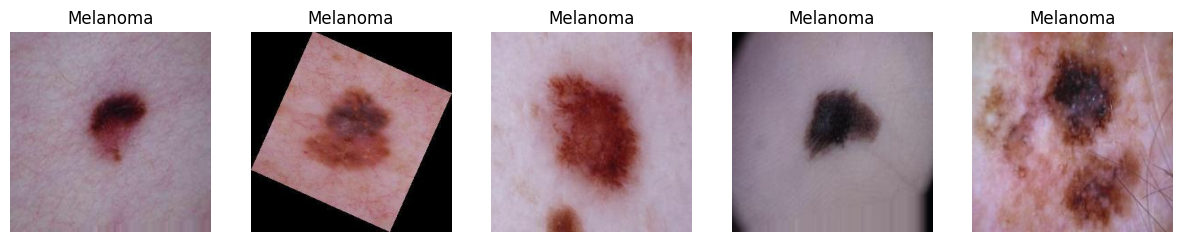

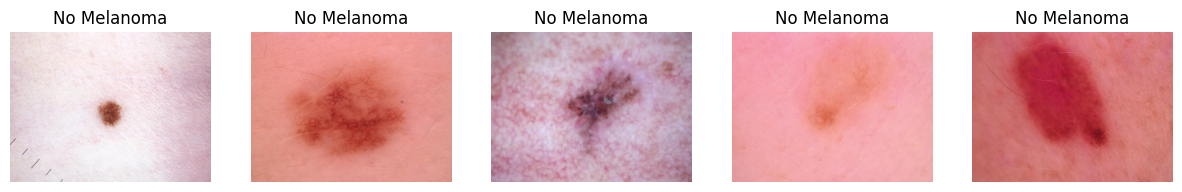

In [14]:
def show_examples(images, title, n=5):
    plt.figure(figsize=(15,3))
    for i in range(n):
        img_path = random.choice(images)
        img = Image.open(img_path)
        plt.subplot(1,n,i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(title)
    plt.show()

show_examples(train_mel_imgs, "Melanoma")
show_examples(train_nomel_imgs, "No Melanoma")

## Balance de clases

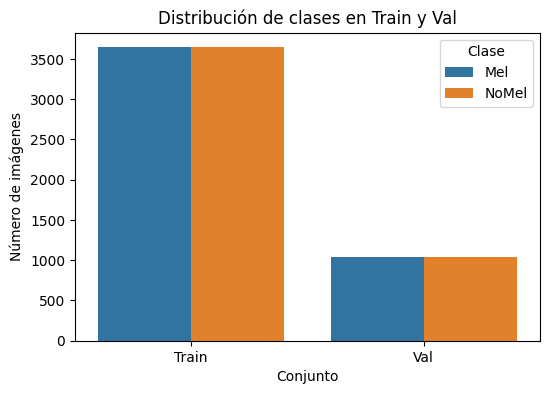

Relación Train Mel/NoMel: 1.00
Relación Val Mel/NoMel: 1.00


In [15]:
data_summary = pd.DataFrame({
    "Conjunto": ["Train", "Train", "Val", "Val"],
    "Clase": ["Mel", "NoMel", "Mel", "NoMel"],
    "Cantidad": [
        len(train_mel_imgs),
        len(train_nomel_imgs),
        len(val_mel_imgs),
        len(val_nomel_imgs)
    ]
})

plt.figure(figsize=(6,4))
sns.barplot(data=data_summary, x="Conjunto", y="Cantidad", hue="Clase")
plt.title("Distribución de clases en Train y Val")
plt.ylabel("Número de imágenes")
plt.show()

# Ratios para ver balance
ratio_train = len(train_mel_imgs) / len(train_nomel_imgs)
ratio_val = len(val_mel_imgs) / len(val_nomel_imgs)

print(f"Relación Train Mel/NoMel: {ratio_train:.2f}")
print(f"Relación Val Mel/NoMel: {ratio_val:.2f}")

## Análisis

Podemos observar que se tienen 7288 datos de training y 2080 datos de validation, ambos distribuidos equitativamente en melanoma y n melanoma (50% de cada uno). Se observa con el ejemplo visual que no todas las imagenes estan derechas, que algunas esta, por ejemplo, rotadas. No se tiene un desbalance de clases, estan balanceadas.

# 2.- Preprocesamiento

## Redimensionamiento, normalización y preparación de imágenes 

ModuleNotFoundError: No module named 'torchvision'

# Modelos a probar

In [ ]:
"""
Modelos planificados:
1. CNN simple desde cero (baseline).
2. Transfer learning con ResNet18 (pre-entrenado en ImageNet).
3. (Opcional) Otro modelo como EfficientNet o MobileNet.

Justificación:
- CNN simple: establece un baseline reproducible.
- Transfer learning: aprovecha representaciones preentrenadas en imágenes generales,
  lo que suele mejorar el rendimiento en datasets médicos pequeños.

"""

# Optimización de hiperparámetros

In [ ]:
"""
Estrategia:
- Random search / manual tuning.
- Hiperparámetros a probar:
    - learning rate
    - batch size
    - número de épocas
    - regularización (dropout, weight decay)
    - capas congeladas/descongeladas en transfer learning
- Selección basada en mejor F1 Score en validación.
"""


# Entrenamiento

# Evaluación

# Visualización de resultados

# Generación de submission